# Rosenbrock banana

Here, we perform optimization for the Rosenbrock banana function, which does not require an AMICI model. In particular, we try several ways of specifying derivative information.

In [1]:
import pypesto
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Define the objective and problem

In [2]:
# first type of objective
objective1 = pypesto.Objective(fun=sp.optimize.rosen, 
                             grad=sp.optimize.rosen_der, 
                             hess=sp.optimize.rosen_hess)

# second type of objective
def rosen2(x):
    return sp.optimize.rosen(x), sp.optimize.rosen_der(x), sp.optimize.rosen_hess(x)
objective2 = pypesto.Objective(fun=rosen2, grad=True, hess=True)

dim_full = 10
lb = -2 * np.ones((dim_full, 1))
ub = 2 * np.ones((dim_full, 1))

problem1 = pypesto.Problem(objective=objective1, lb=lb, ub=ub)
problem2 = pypesto.Problem(objective=objective2, lb=lb, ub=ub)

## Illustration

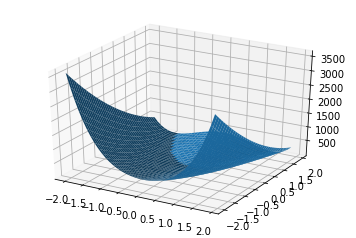

In [3]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
x, y = np.meshgrid(x, y)
z = np.zeros_like(x)
for j in range(0, x.shape[0]):
    for k in range(0, x.shape[1]):
        z[j,k] = objective1([x[j,k], y[j,k]], (0,))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X=x, Y=y, Z=z)        

## Run optimization

In [4]:
optimizer = pypesto.ScipyOptimizer()
                                                                                                                                                                                                                                                                                                                                                                
result1 = pypesto.minimize(problem=problem1, optimizer=optimizer, n_starts=20)
result2 = pypesto.minimize(problem=problem2, optimizer=optimizer, n_starts=20)

/home/yannik/yenv/lib/python3.6/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  RuntimeWarning)
/home/yannik/yenv/lib/python3.6/site-packages/scipy/optimize/_minimize.py:513: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  'information (hessp).' % method, RuntimeWarning)


## Visualize and analyze results

pypesto offers easy-to-use visualization routines:

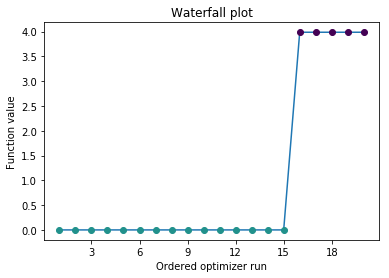

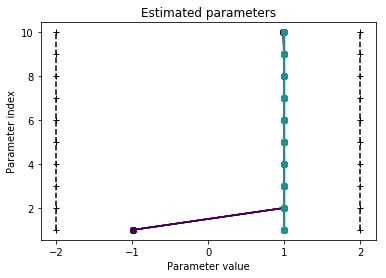

In [5]:
import pypesto.visualize

pypesto.visualize.waterfall(result1)
pypesto.visualize.parameters(result1)

If the result needs to be examined in more detail, it can easily be exported as a pandas.DataFrame:

In [6]:
result1.optimize_result.as_dataframe(['fval', 'n_fval', 'time'])

fval  n_fval      time
0   9.107884e-14      80  0.021316
1   1.581246e-12      77  0.024506
2   2.520776e-12      72  0.016224
3   3.387057e-12      82  0.021987
4   1.420953e-11      72  0.020656
5   1.563795e-11      84  0.014421
6   4.708020e-11      74  0.009662
7   4.798248e-11     114  0.026381
8   4.898326e-11      96  0.024466
9   7.823686e-11      70  0.060618
10  1.124826e-10      81  0.024168
11  1.146190e-10      87  0.018467
12  1.285766e-10     131  0.053182
13  1.672435e-10      82  0.021449
14  1.015451e-09      79  0.015887
15  3.986579e+00      57  0.013932
16  3.986579e+00      95  0.017608
17  3.986579e+00      85  0.024141
18  3.986579e+00      76  0.017323
19  3.986579e+00      57  0.018598